In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("weatherAUS.csv")
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74574,2016-05-16,Nhil,6.0,18.5,0.0,NaN,NaN,NNW,46.0,N,...,74.0,58.0,1017.3,1012.0,NaN,NaN,11.9,18.2,No,No
13790,2013-12-18,Moree,17.7,35.6,0.0,11.4,13.4,SE,48.0,NE,...,48.0,18.0,1021.2,1017.1,1.0,NaN,24.2,33.7,No,No
26197,2014-10-30,Penrith,13.5,32.8,0.0,NaN,NaN,WNW,31.0,SE,...,66.0,22.0,NaN,NaN,NaN,NaN,20.5,30.9,No,No
28308,2012-03-17,Richmond,18.0,20.0,NaN,NaN,NaN,S,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
121059,2009-08-26,Perth,5.2,19.3,0.0,2.4,10.5,SW,28.0,NaN,...,81.0,56.0,1020.8,1016.3,0.0,1.0,12.4,18.2,No,No


In [122]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [123]:
# Mean Imputation
def meanImputation(df, feature):
    df[feature] = df[feature].fillna(df[feature].mean())

In [124]:
meanImputation(df, "MinTemp")

In [125]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [126]:
# Median Imputation
def medianImputation(df, feature):
    df[feature+"_median"] = df[feature].fillna(df[feature].median())

In [127]:
medianImputation(df, "MaxTemp")

In [128]:
# Random Sample Imputation
def randomSampleImputation(df, feature):
    df[feature+"_random"]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature, +"_random"]=random_sample

In [129]:
def imputeNaN(df, feature):
    df[feature+"_mean"] = df[feature].fillna(df[feature].mean())
    df[feature+"_median"] = df[feature].fillna(df[feature].median())
    df[feature+"_random"]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+"_random"]=random_sample

In [130]:
imputeNaN(df, "MaxTemp")

In [131]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp_median,MaxTemp_mean,MaxTemp_random
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,22.9,22.900000,22.9
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,25.1,25.100000,25.1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,25.7,25.700000,25.7
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,28.0,28.000000,28.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,32.3,32.300000,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,23.4,23.400000,23.4
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,25.3,25.300000,25.3
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,26.9,26.900000,26.9
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,27.0,27.000000,27.0


<AxesSubplot:ylabel='Density'>

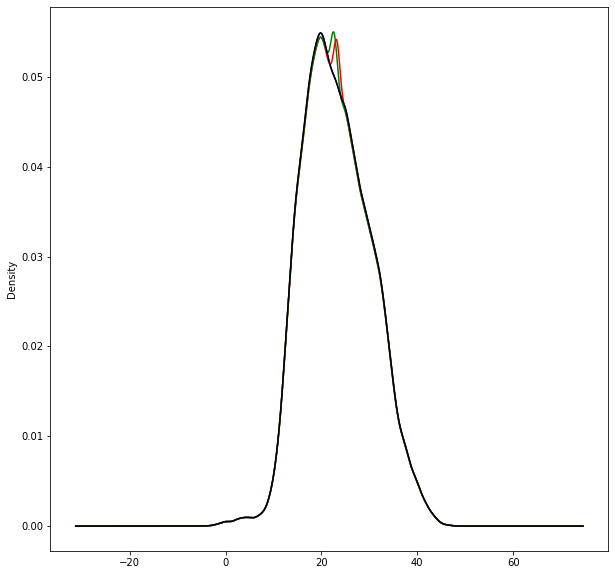

In [132]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
df["MaxTemp"].plot(kind="kde", ax=ax, color="blue")
df["MaxTemp_mean"].plot(kind="kde", ax=ax, color="red")
df["MaxTemp_median"].plot(kind="kde", ax=ax, color="green")
df["MaxTemp_random"].plot(kind="kde", ax=ax, color="black")

In [133]:
def newFeatureImputation(df, feature):
    df[feature+"_NAN"] = np.where(df[feature].isnull(),1,0)

In [134]:
newFeatureImputation(df, "Evaporation")

In [135]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp_median,MaxTemp_mean,MaxTemp_random,Evaporation_NAN
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,22.9,22.900000,22.9,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,25.1,25.100000,25.1,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,25.7,25.700000,25.7,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,28.0,28.000000,28.0,1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,32.3,32.300000,32.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,NaN,10.1,22.4,No,No,23.4,23.400000,23.4,1
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,NaN,10.9,24.5,No,No,25.3,25.300000,25.3,1
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,NaN,12.5,26.1,No,No,26.9,26.900000,26.9,1
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,3.0,2.0,15.1,26.0,No,No,27.0,27.000000,27.0,1


In [136]:
## Frequent Category Imputation
def frequentCategoryImputation(df, feature):
    df[feature+"_frequent"] = df[feature].fillna(df[feature].mode()[0])

In [137]:
df["Cloud9am"].mode()[0]

7.0

In [138]:
frequentCategoryImputation(df, "Cloud9am")

In [139]:
df.isnull().sum()

Date                     0
Location                 0
MinTemp                  0
MaxTemp               1261
Rainfall              3261
Evaporation          62790
Sunshine             69835
WindGustDir          10326
WindGustSpeed        10263
WindDir9am           10566
WindDir3pm            4228
WindSpeed9am          1767
WindSpeed3pm          3062
Humidity9am           2654
Humidity3pm           4507
Pressure9am          15065
Pressure3pm          15028
Cloud9am             55888
Cloud3pm             59358
Temp9am               1767
Temp3pm               3609
RainToday             3261
RainTomorrow          3267
MaxTemp_median           0
MaxTemp_mean             0
MaxTemp_random           0
Evaporation_NAN          0
Cloud9am_frequent        0
dtype: int64

In [140]:
def newFeatureImputation(df, feature):
    df[feature+"New_NAN"] = np.where(df[feature].isnull(),"Missing",df[feature])

In [141]:
newFeatureImputation(df, "WindGustDir")

In [142]:
df.isnull().sum()

Date                      0
Location                  0
MinTemp                   0
MaxTemp                1261
Rainfall               3261
Evaporation           62790
Sunshine              69835
WindGustDir           10326
WindGustSpeed         10263
WindDir9am            10566
WindDir3pm             4228
WindSpeed9am           1767
WindSpeed3pm           3062
Humidity9am            2654
Humidity3pm            4507
Pressure9am           15065
Pressure3pm           15028
Cloud9am              55888
Cloud3pm              59358
Temp9am                1767
Temp3pm                3609
RainToday              3261
RainTomorrow           3267
MaxTemp_median            0
MaxTemp_mean              0
MaxTemp_random            0
Evaporation_NAN           0
Cloud9am_frequent         0
WindGustDirNew_NAN        0
dtype: int64

In [143]:
df["WindGustDirNew_NAN"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'Missing', 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [144]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

Handling Categorical Features

In [145]:
#One hot encoding
def oneHotEncoding(df, feature):
    df[feature] = pd.get_dummies(df[feature], drop_first=True)

In [146]:
oneHotEncoding(df, "RainTomorrow")

In [147]:
#Label Encoding
def labelEncoding(df, feature):
    from sklearn.preprocessing import LabelEncoder
    labelEncoder = LabelEncoder()
    df[feature] = labelEncoder.fit_transform(list(df[feature].values))

In [148]:
labelEncoding(df, "WindGustDir")

In [149]:
df.dtypes

Date                   object
Location               object
MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
WindGustDir             int64
WindGustSpeed         float64
WindDir9am             object
WindDir3pm             object
WindSpeed9am          float64
WindSpeed3pm          float64
Humidity9am           float64
Humidity3pm           float64
Pressure9am           float64
Pressure3pm           float64
Cloud9am              float64
Cloud3pm              float64
Temp9am               float64
Temp3pm               float64
RainToday              object
RainTomorrow            uint8
MaxTemp_median        float64
MaxTemp_mean          float64
MaxTemp_random        float64
Evaporation_NAN         int32
Cloud9am_frequent     float64
WindGustDirNew_NAN     object
dtype: object

In [151]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp_median,MaxTemp_mean,MaxTemp_random,Evaporation_NAN,Cloud9am_frequent,WindGustDirNew_NAN
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,13,44.0,W,...,16.9,21.8,No,0,22.9,22.900000,22.9,1,8.0,W
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,14,44.0,NNW,...,17.2,24.3,No,0,25.1,25.100000,25.1,1,7.0,WNW
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,15,46.0,W,...,21.0,23.2,No,0,25.7,25.700000,25.7,1,7.0,WSW
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,4,24.0,SE,...,18.1,26.5,No,0,28.0,28.000000,28.0,1,7.0,NE
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,13,41.0,ENE,...,17.8,29.7,No,0,32.3,32.300000,32.3,1,7.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,0,31.0,SE,...,10.1,22.4,No,0,23.4,23.400000,23.4,1,7.0,E
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,6,22.0,SE,...,10.9,24.5,No,0,25.3,25.300000,25.3,1,7.0,NNW
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,3,37.0,SE,...,12.5,26.1,No,0,26.9,26.900000,26.9,1,7.0,N
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,9,28.0,SSE,...,15.1,26.0,No,0,27.0,27.000000,27.0,1,3.0,SE


In [153]:
# Target Guided Ordinal Encoding
def targetGuidedOrdinalEncoding(df, feature, dependent_feature):
    feature_label = df.groupby([feature])[dependent_feature].mean().sort_values(ascending=False).index
    feature_label2 ={k:i for i,k in enumerate(feature_label)}
    df[feature] = df[feature].map(feature_label2)

In [154]:
targetGuidedOrdinalEncoding(df, "WindDir3pm", "RainTomorrow")

In [155]:
# Target Guided Mean Encoding
def targetGuidedMeanEncoding(df, feature, dependent_feature):
    feature_label = df.groupby([feature])[dependent_feature].mean().to_dict()
    df[feature] = df[feature].map(feature_label)

In [156]:
targetGuidedMeanEncoding(df, "WindDir9am", "RainTomorrow")

In [157]:
df.groupby(["WindDir9am"])["RainTomorrow"].mean().sort_values(ascending=False).index

Float64Index([0.30451127819548873, 0.29852015648919883,  0.2730597782603726,
               0.2628859638331898, 0.26274615592123013, 0.25499468022224847,
              0.24088838268792712, 0.22664133919031224, 0.21681824172927375,
               0.2044062051883718, 0.19413327174038572,   0.175702370500439,
              0.17419601837672283,  0.1605470011844514, 0.14652686762778505,
              0.14330863121185702],
             dtype='float64', name='WindDir9am')

In [158]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [159]:
df1

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [160]:
df1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [161]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [162]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp_median,MaxTemp_mean,MaxTemp_random,Evaporation_NAN,Cloud9am_frequent,WindGustDirNew_NAN
0,2008-12-01,30,13.4,22.9,0.6,NaN,NaN,13,44.0,0.254995,...,16.9,21.8,No,0,22.9,22.900000,22.9,1,8.0,W
1,2008-12-02,30,7.4,25.1,0.0,NaN,NaN,14,44.0,0.304511,...,17.2,24.3,No,0,25.1,25.100000,25.1,1,7.0,WNW
2,2008-12-03,30,12.9,25.7,0.0,NaN,NaN,15,46.0,0.254995,...,21.0,23.2,No,0,25.7,25.700000,25.7,1,7.0,WSW
3,2008-12-04,30,9.2,28.0,0.0,NaN,NaN,4,24.0,0.160547,...,18.1,26.5,No,0,28.0,28.000000,28.0,1,7.0,NE
4,2008-12-05,30,17.5,32.3,1.0,NaN,NaN,13,41.0,0.174196,...,17.8,29.7,No,0,32.3,32.300000,32.3,1,7.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,NaN,NaN,0,31.0,0.160547,...,10.1,22.4,No,0,23.4,23.400000,23.4,1,7.0,E
145456,2017-06-22,49,3.6,25.3,0.0,NaN,NaN,6,22.0,0.160547,...,10.9,24.5,No,0,25.3,25.300000,25.3,1,7.0,NNW
145457,2017-06-23,49,5.4,26.9,0.0,NaN,NaN,3,37.0,0.160547,...,12.5,26.1,No,0,26.9,26.900000,26.9,1,7.0,N
145458,2017-06-24,49,7.8,27.0,0.0,NaN,NaN,9,28.0,0.175702,...,15.1,26.0,No,0,27.0,27.000000,27.0,1,3.0,SE


In [164]:
df.dtypes

Date                   object
Location                int64
MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
WindGustDir             int64
WindGustSpeed         float64
WindDir9am            float64
WindDir3pm            float64
WindSpeed9am          float64
WindSpeed3pm          float64
Humidity9am           float64
Humidity3pm           float64
Pressure9am           float64
Pressure3pm           float64
Cloud9am              float64
Cloud3pm              float64
Temp9am               float64
Temp3pm               float64
RainToday              object
RainTomorrow            uint8
MaxTemp_median        float64
MaxTemp_mean          float64
MaxTemp_random        float64
Evaporation_NAN         int32
Cloud9am_frequent     float64
WindGustDirNew_NAN     object
dtype: object

In [165]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 26
Discrete feature Count 8
Continuous feature Count 18
Categorical feature Count 3


c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

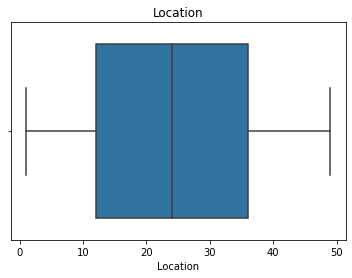

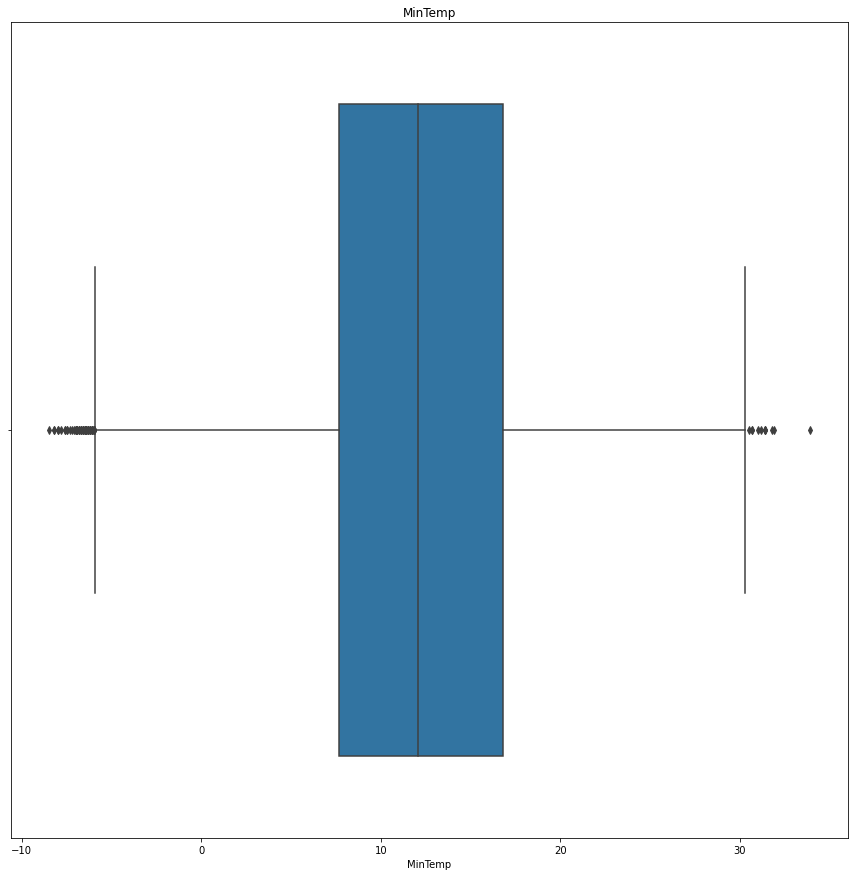

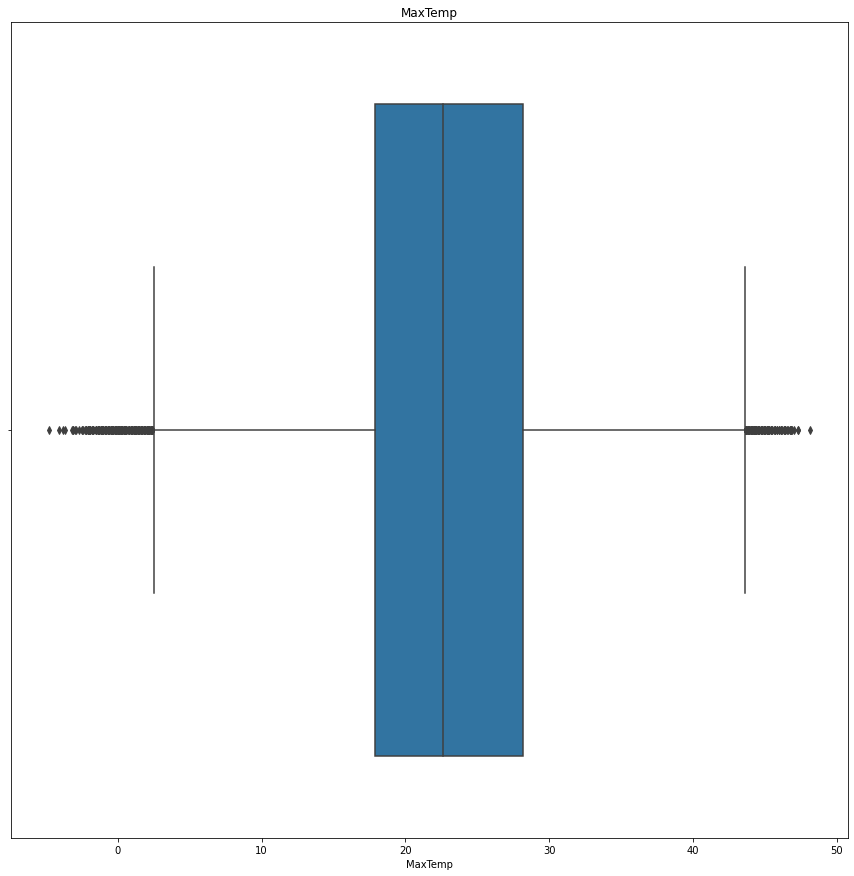

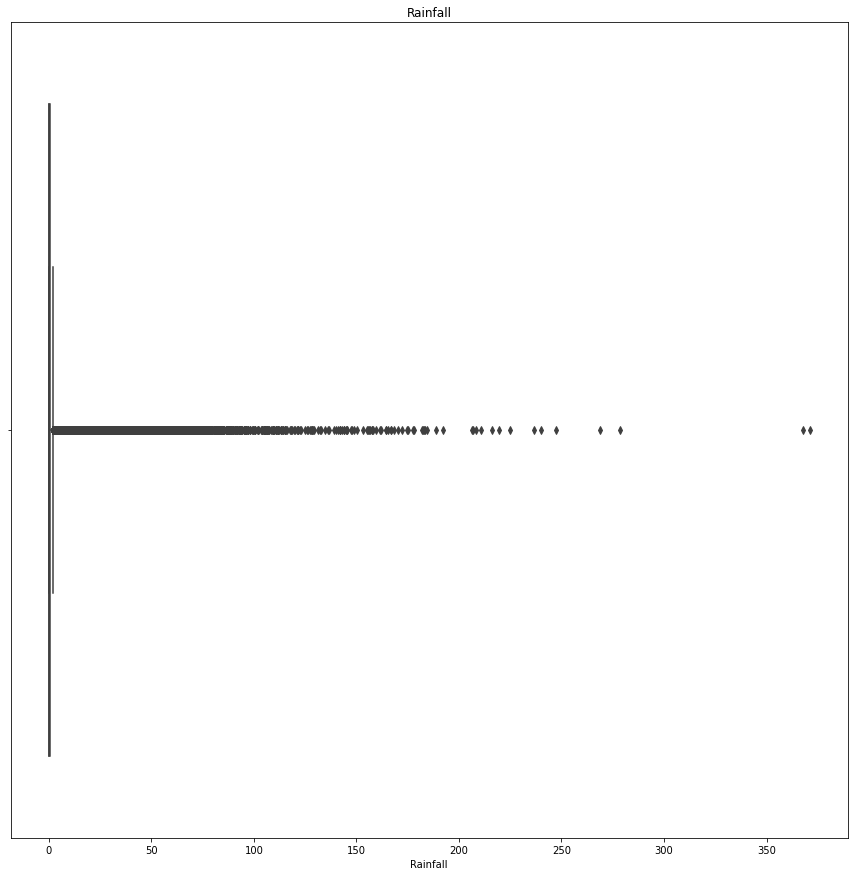

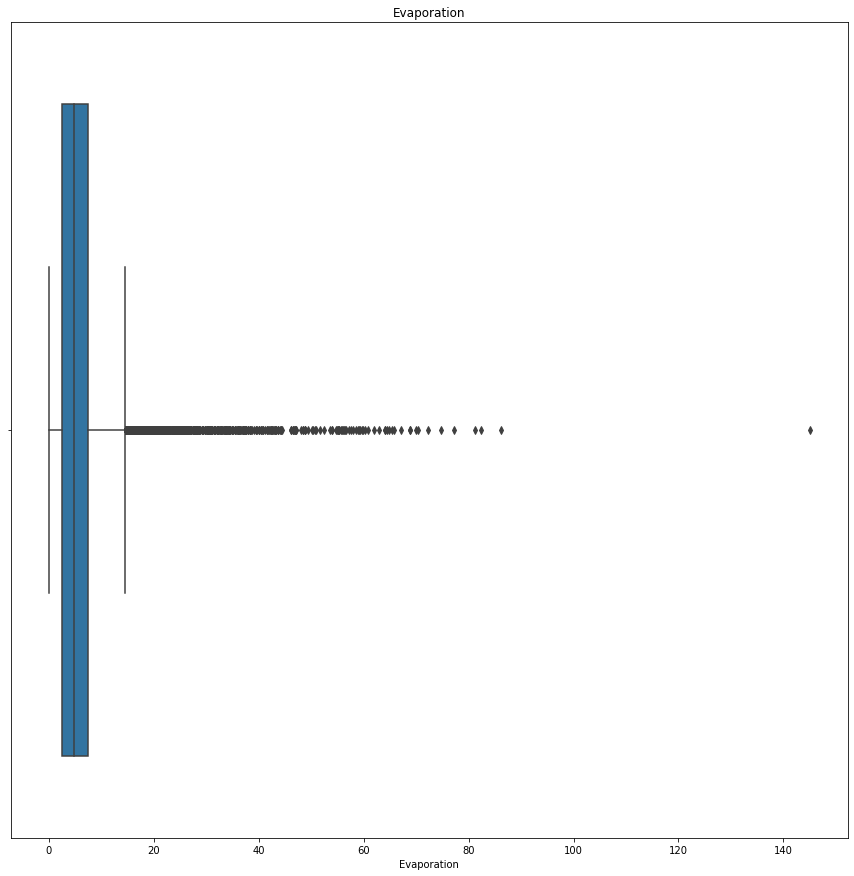

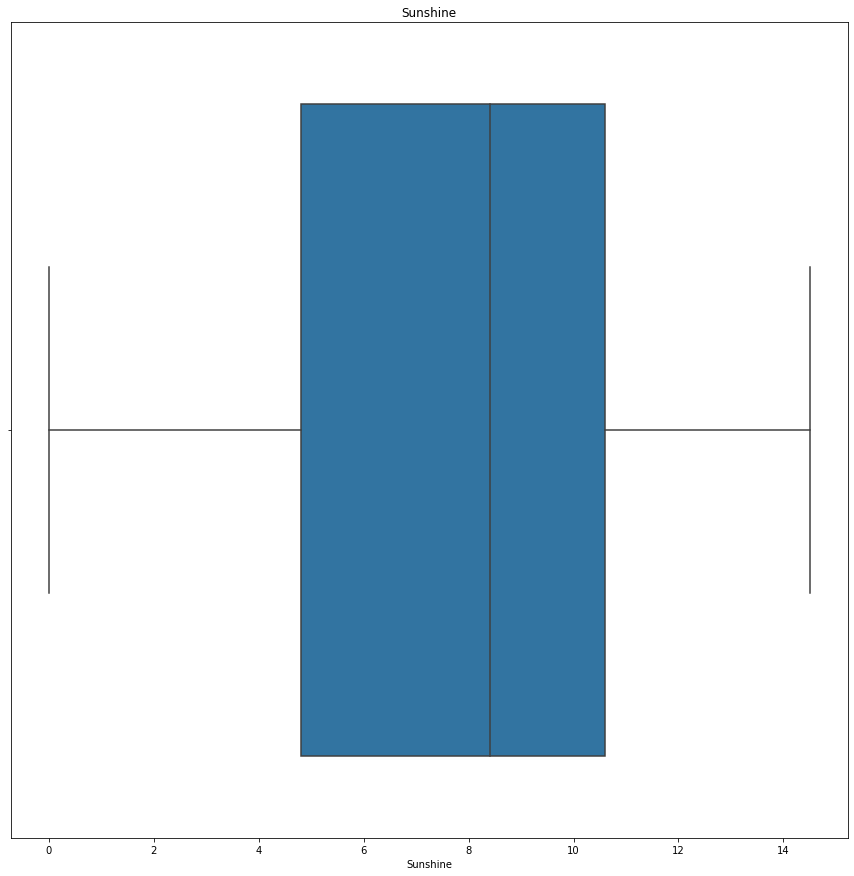

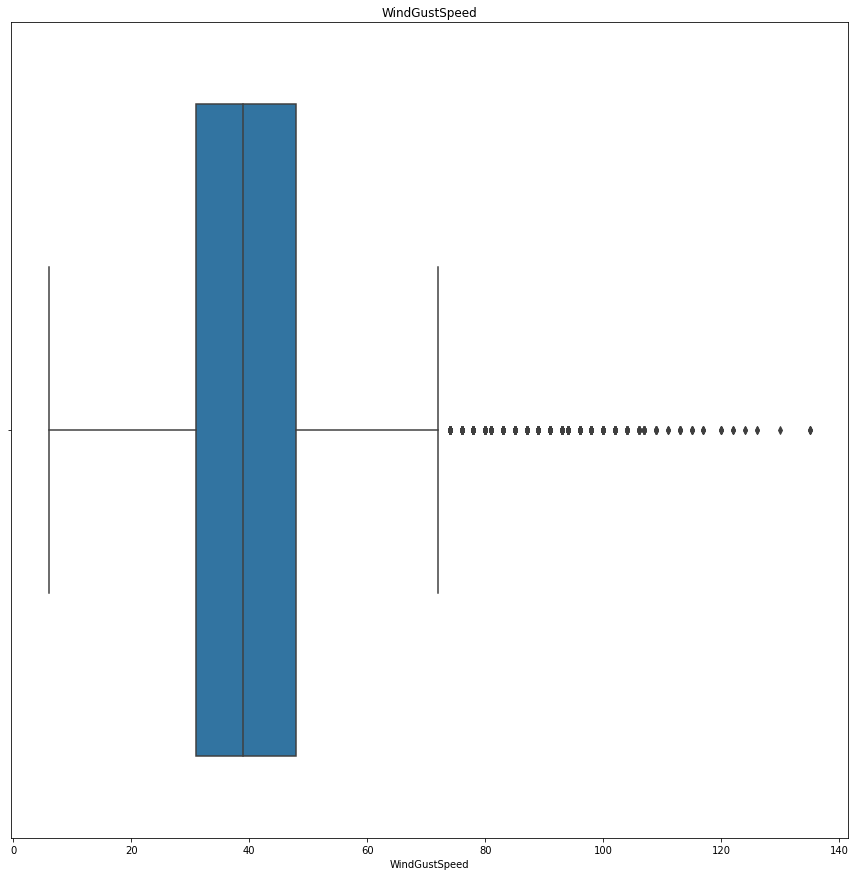

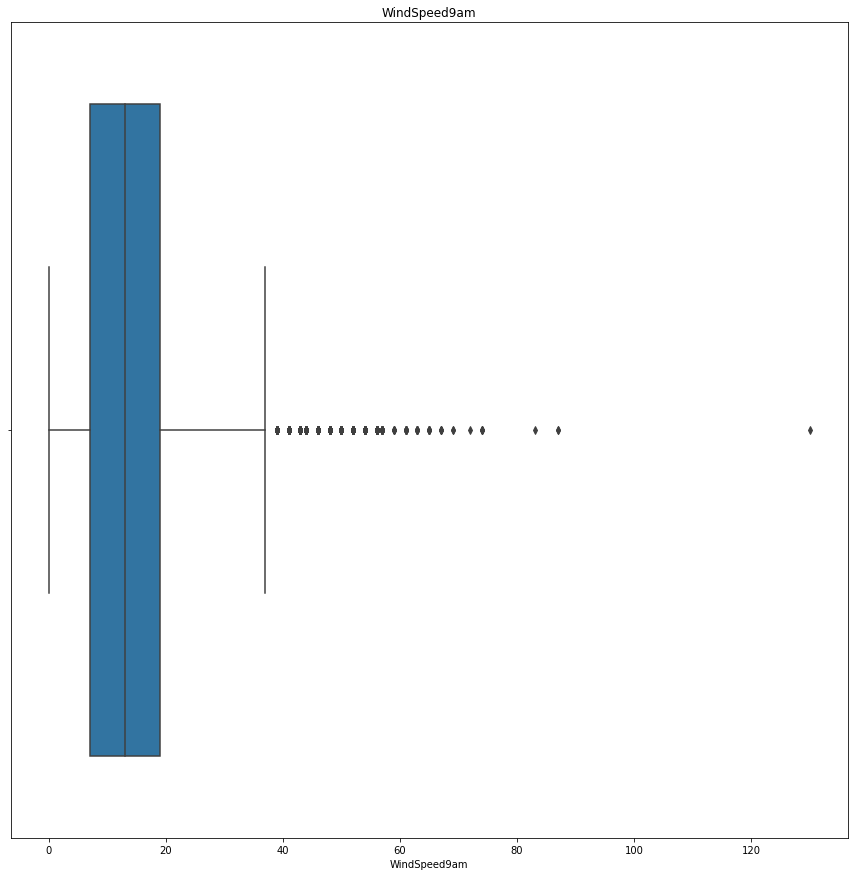

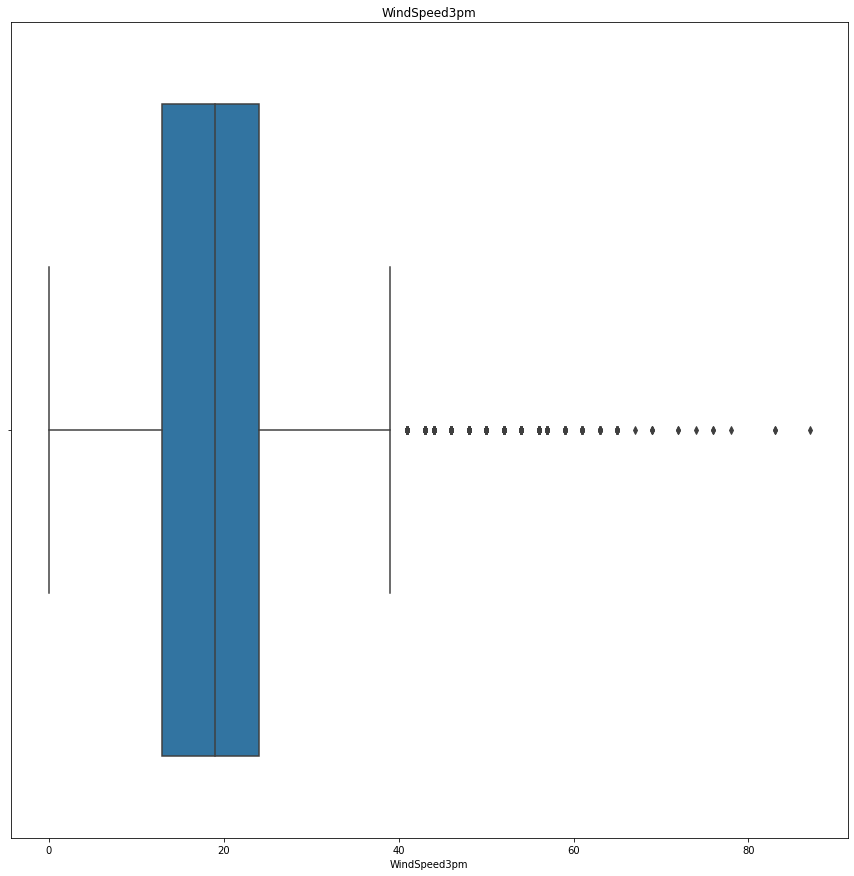

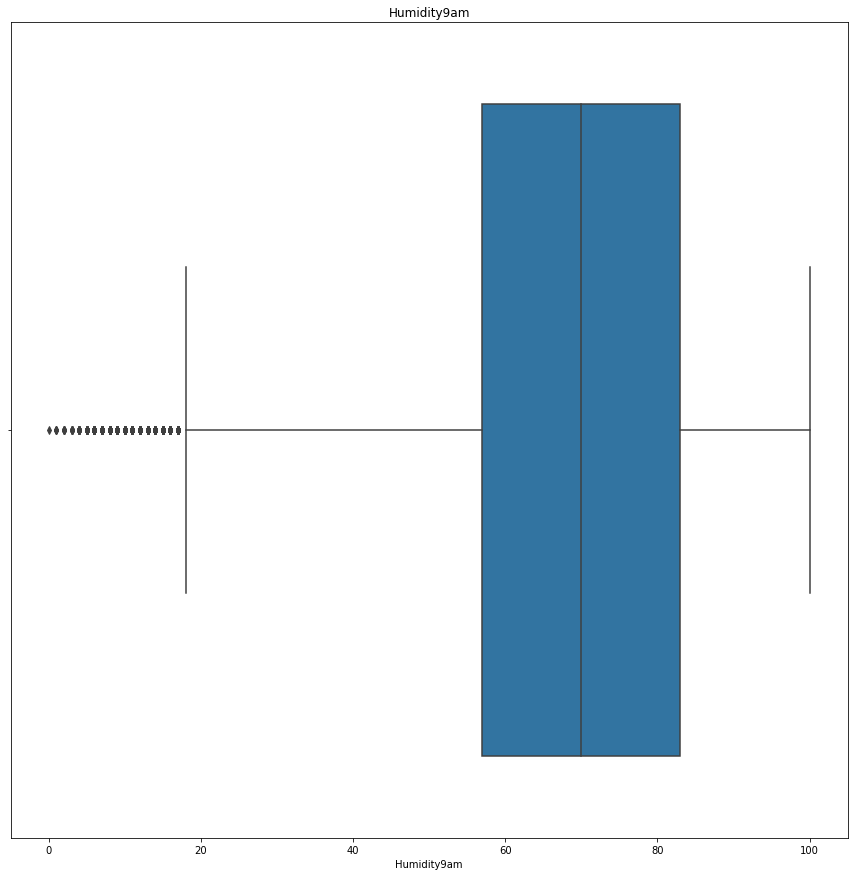

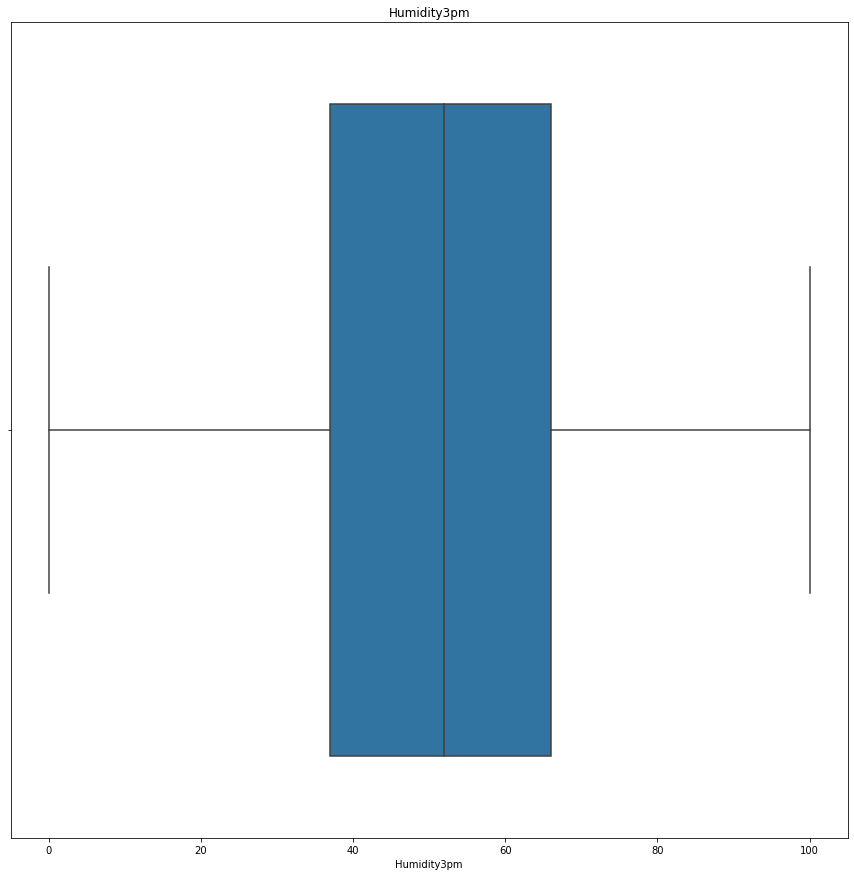

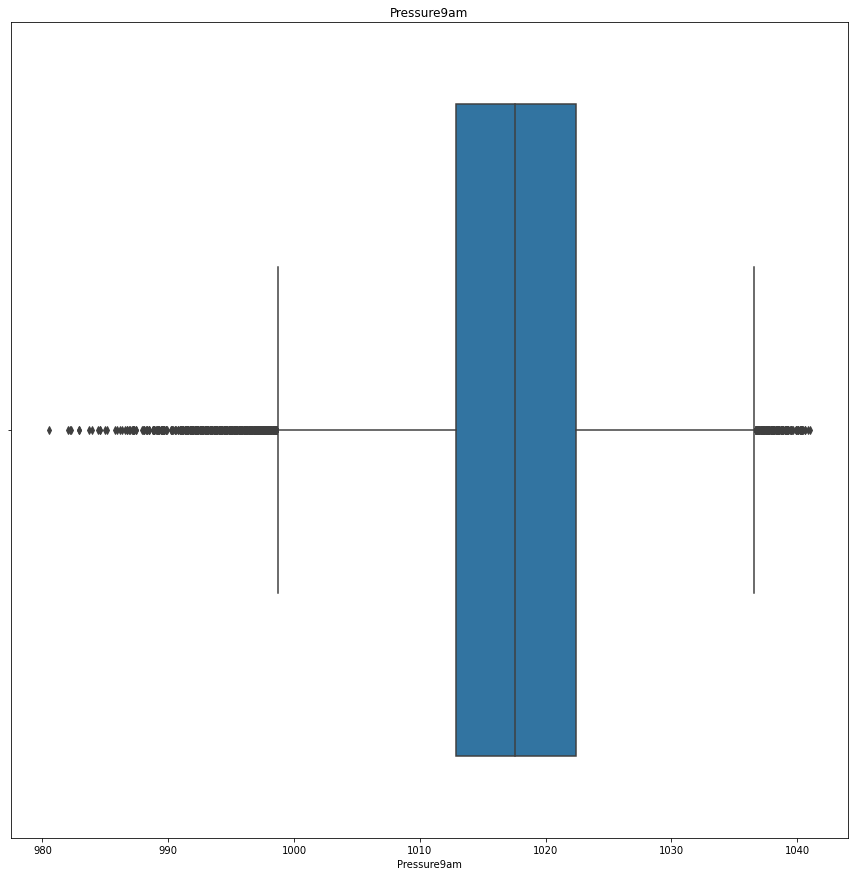

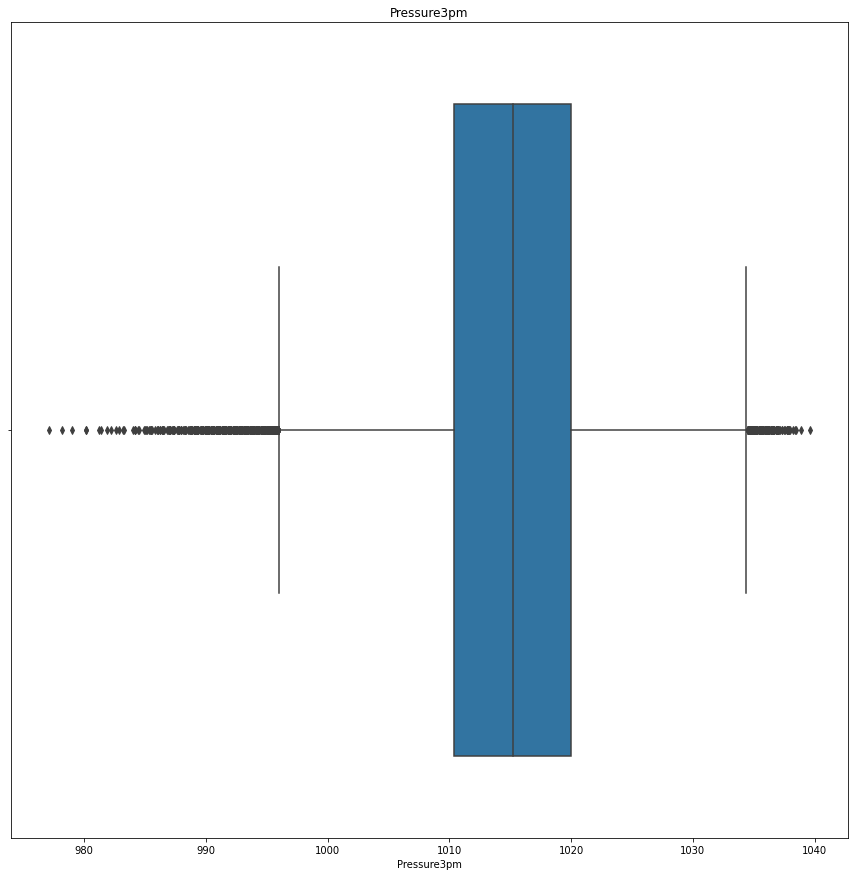

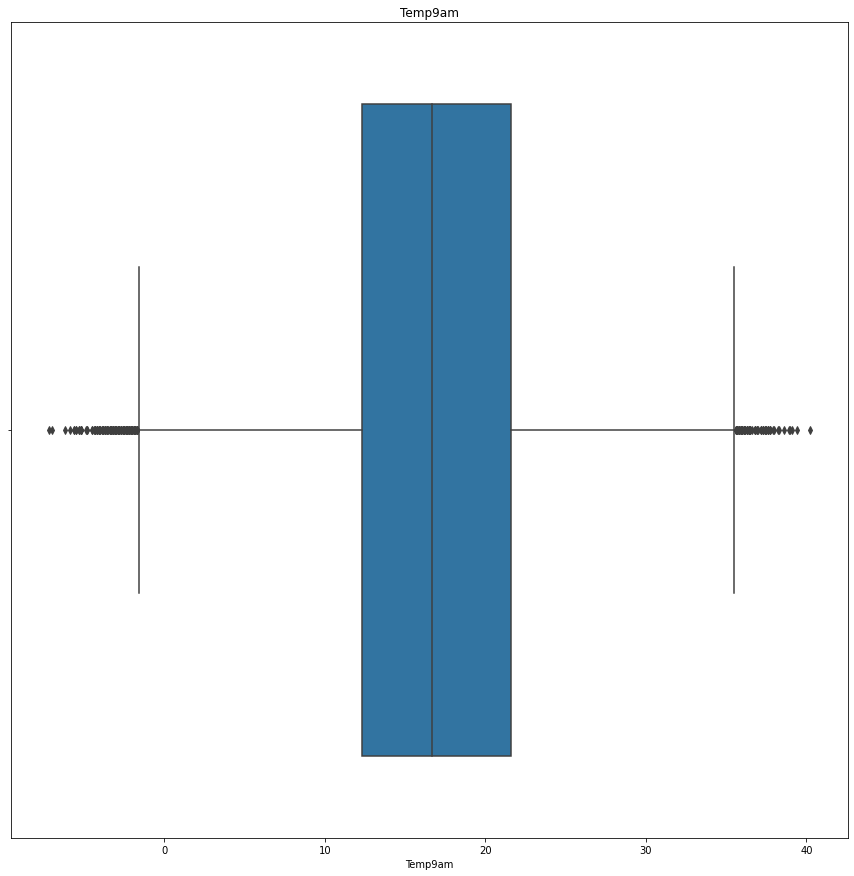

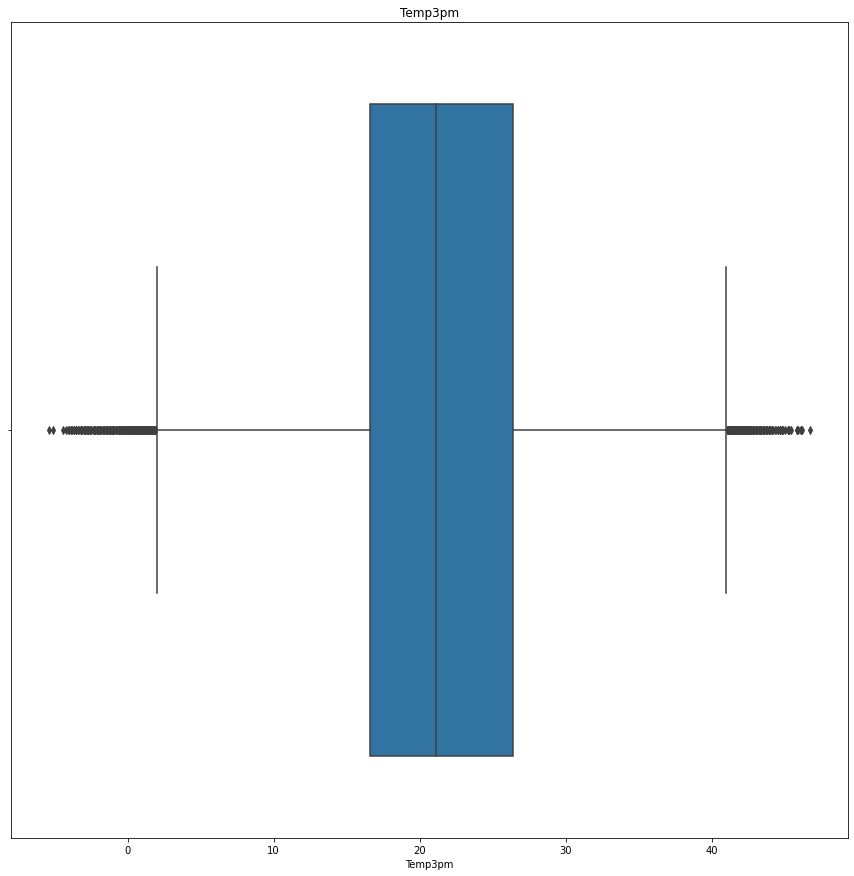

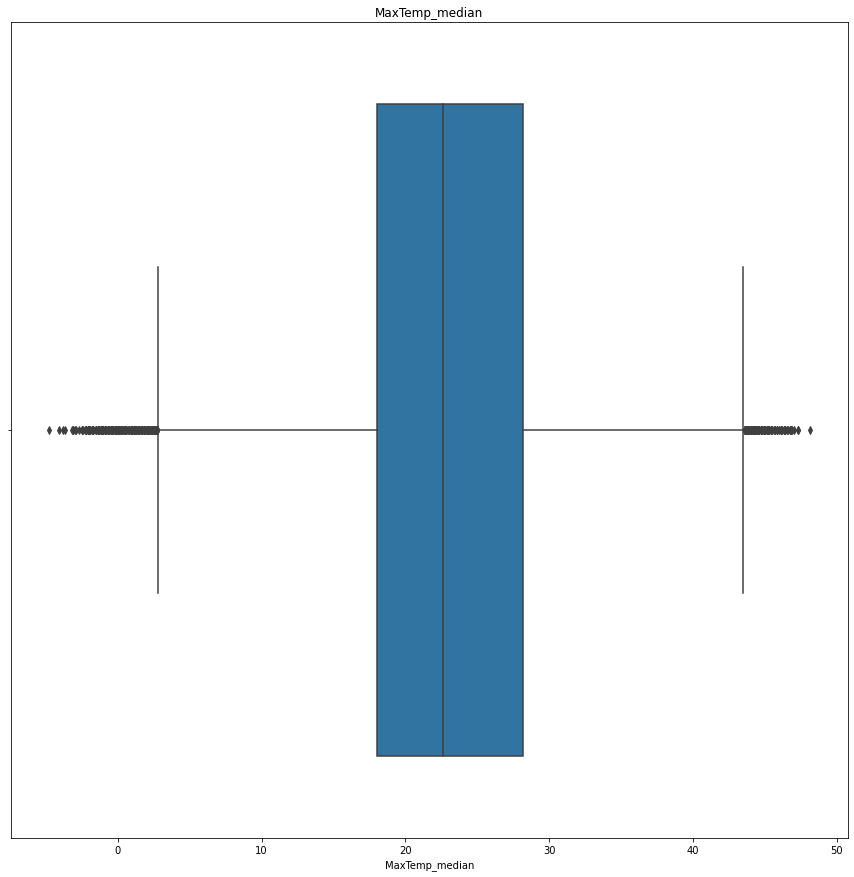

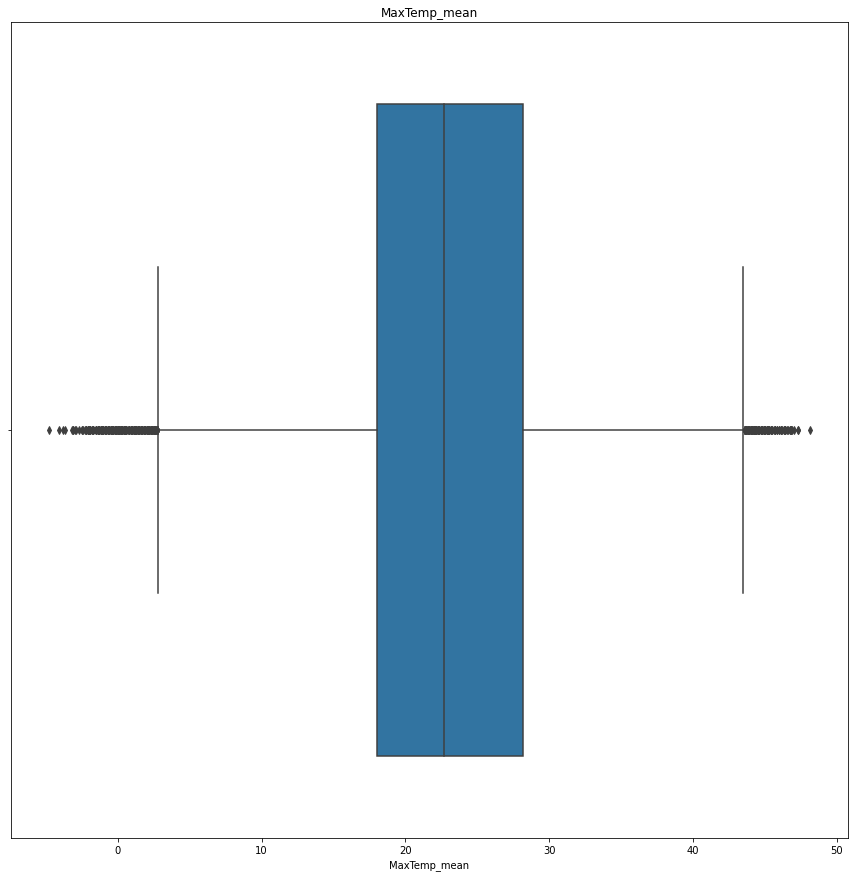

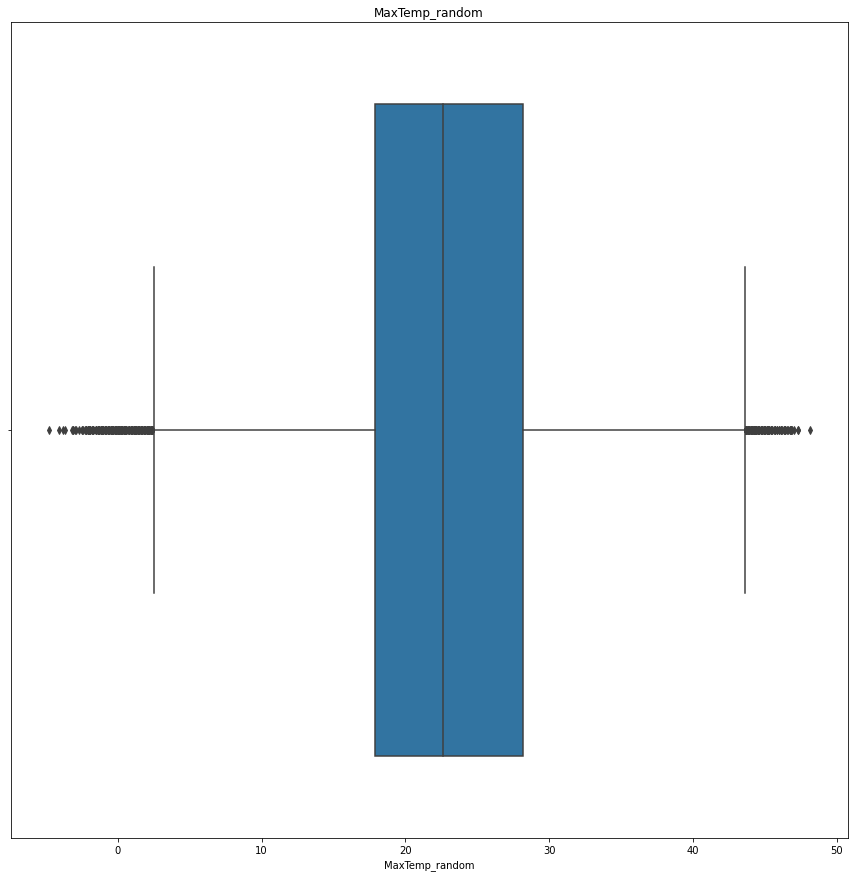

<Figure size 1080x1080 with 0 Axes>

In [166]:
# Outlier Detection
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [167]:
def IQR(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bridge = Q1 - 1.5 * IQR
    upper_bridge = Q3 + 1.5 * IQR
    df.loc[df[feature]<=lower_bridge, feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge, feature] = upper_bridge

In [168]:
IQR(df, "Temp9am")

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Temp9am'>

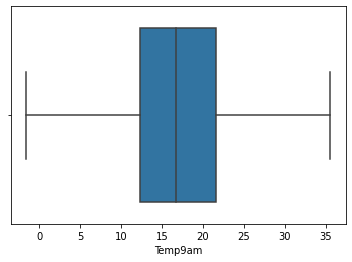

In [169]:
sns.boxplot(df["Temp9am"])

In [170]:
df.to_csv("processed.csv")